#### Learn the power usage of physical machines as a function of 3 input for machine 2

Best KNN parameters for Machine 2: {'n_neighbors': 2, 'weights': 'distance'}
KNN Metrics for Machine 2:
 RMSE: 6.847372764609464
 MAE: 4.967145416606101
 R²: 0.9643438505433225


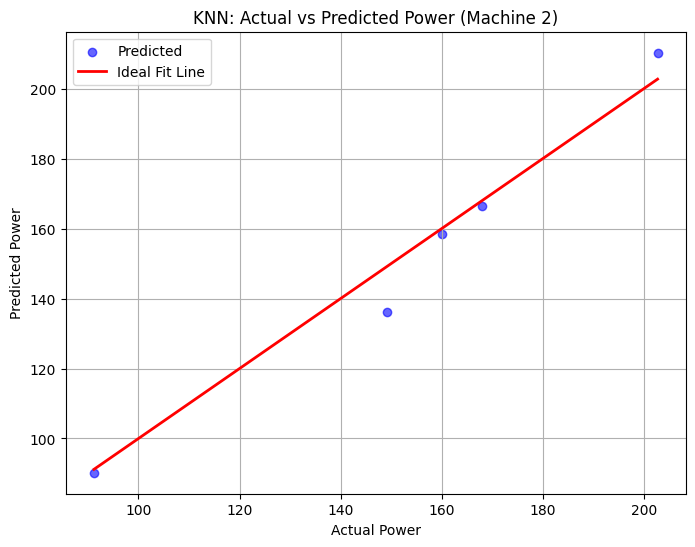

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
import joblib  # For saving and loading models

# Load and filter the dataset (Machine 2)
df_machine2 = pd.read_csv('../data/machine2.csv')
df_machine2_filtered = df_machine2[(df_machine2['check'] >= 90) & (df_machine2['check'] <= 110)]

# Split into features (X) and target (y)
X_machine2 = df_machine2_filtered[['input_1', 'input_2', 'input_3']]
y_machine2 = df_machine2_filtered['power']

# Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_machine2, y_machine2, test_size=0.10, random_state=8)

# Fine-tune KNN using GridSearchCV
param_grid = {'n_neighbors': list(range(1, 11)), 'weights': ['uniform', 'distance']}
knn = KNeighborsRegressor()
grid_search_knn2 = GridSearchCV(knn, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search_knn2.fit(X_train2, y_train2)

# Best parameters for Machine 2
print(f"Best KNN parameters for Machine 2: {grid_search_knn2.best_params_}")

# Save the model to a file
joblib.dump(grid_search_knn2.best_estimator_, '../models/knn_machine2_model.pkl')

# Predictions and metrics
y_pred_knn2 = grid_search_knn2.predict(X_test2)
rmse_knn2 = root_mean_squared_error(y_test2, y_pred_knn2)
mae_knn2 = mean_absolute_error(y_test2, y_pred_knn2)
r2_knn2 = r2_score(y_test2, y_pred_knn2)

print(f"KNN Metrics for Machine 2:\n RMSE: {rmse_knn2}\n MAE: {mae_knn2}\n R²: {r2_knn2}")

# Plot: Actual vs Predicted Power for Machine 2
plt.figure(figsize=(8, 6))
plt.scatter(y_test2, y_pred_knn2, color='blue', label='Predicted', alpha=0.6)
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red', lw=2, label='Ideal Fit Line')
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('KNN: Actual vs Predicted Power (Machine 2)')
plt.legend()
plt.grid(True)
plt.show()


#### Include an export of any modelling you have completed in a method that could be re-used by another program without re-training if applicable.

In [2]:

# Load the saved KNN model (Change the file path accordingly for Machine 1 or Machine 2)
model_path = '../models/knn_machine2_model.pkl'  # Use 'knn_machine2_model.pkl' for Machine 2
loaded_model = joblib.load(model_path)

# Example new data for inference
# Ensure the input shape matches the training features (input_1, input_2, input_3)
new_data = np.array([[27.5, 8.5, 881], [15, 12, 550]])  # Replace with actual new input data

# Perform inference
predictions = loaded_model.predict(new_data)

# Display predictions
print(f"Predicted Power Values: {predictions}")


Predicted Power Values: [126.99942907 132.99158226]


/Users/shivampratapsingh/Documents/python_code_dir/assignment/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
